In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Thilipan'

In [3]:
cd downloads

C:\Users\Thilipan\downloads


In [143]:
words = open("names.txt" , 'r').read().splitlines()

In [144]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [145]:
chars = sorted(list(set(''.join(words))))
stoi = {}
for key, char in enumerate(chars):
    stoi[char] = key+1
stoi['.'] = 0
itos = {}
for cha, key in stoi.items():
    itos[key] = cha


In [135]:
word_size = 3
X = []
y = []

for w in words[:5]:
    context = [0] * word_size
    for i in w + '.':
        xh = stoi[i]
        y.append(xh)
        X.append(context)
        con = []
        for co in context:
            con.append(itos[co])
        cont = ''.join(con)
        print(cont,'--->',itos[xh])
        context = context[1:] + [xh]
x = torch.tensor(X) #feature
y = torch.tensor(y) #label
            

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [8]:
x[:5]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])

In [9]:
g = torch.Generator().manual_seed(69)
c = torch.randn([27,2] ,generator = g) #the look up table each index has 2 dimensions and embedded

In [10]:
c

tensor([[-0.5300, -1.3035],
        [ 0.4438,  1.2221],
        [ 1.0395,  0.9608],
        [ 0.4214,  0.7452],
        [-1.8389, -1.2497],
        [-0.2485,  0.1428],
        [-1.0509,  0.3527],
        [-0.0916,  0.0341],
        [-0.8986,  0.1022],
        [-0.6627, -0.1350],
        [-0.3983, -1.7892],
        [ 1.2785,  1.3351],
        [-0.3066,  1.0382],
        [ 1.2762,  0.0419],
        [-1.2794, -1.8432],
        [ 0.8633, -1.7786],
        [-0.8080, -0.8735],
        [ 0.9367, -1.2319],
        [ 1.5287, -0.2759],
        [ 0.6394,  1.2406],
        [ 0.7299, -0.8683],
        [ 0.6726,  0.1142],
        [ 1.0251,  1.3822],
        [-0.3832,  1.4027],
        [ 1.9010, -1.1275],
        [ 0.7207, -0.2668],
        [-1.6520, -1.1392]])

In [11]:
c[[0,0,0]] #you can index with list in pt so inside c[] index[0,0,0] will give the same 

tensor([[-0.5300, -1.3035],
        [-0.5300, -1.3035],
        [-0.5300, -1.3035]])

In [12]:
c[x][:3] # like above x has int of the features and putting them in c so thats why 3 of them and 2 dimesions each cuz of c

tensor([[[-0.5300, -1.3035],
         [-0.5300, -1.3035],
         [-0.5300, -1.3035]],

        [[-0.5300, -1.3035],
         [-0.5300, -1.3035],
         [-0.2485,  0.1428]],

        [[-0.5300, -1.3035],
         [-0.2485,  0.1428],
         [ 1.2762,  0.0419]]])

In [13]:
emb = c[x] # embedding look up table
emb.shape # the 32,3,2 means 32 from x so 32 batch size will be the number of cols and for each one of the x[0,0,0] we have 2 vectors 

torch.Size([32, 3, 2])

In [14]:
emb[0]

tensor([[-0.5300, -1.3035],
        [-0.5300, -1.3035],
        [-0.5300, -1.3035]])

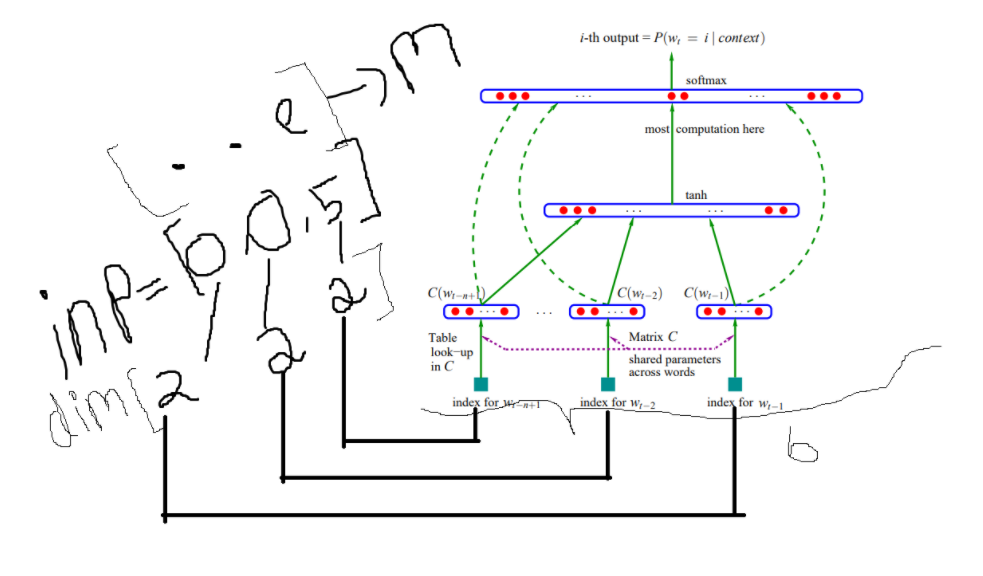

In [15]:
u = torch.arange(10)
u

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
u.view(5,2)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [17]:
u.view(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [18]:
torch.arange(18).view(2,3,3) #torch.view() => literal fucking blackmagic

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [46]:
gen = torch.Generator().manual_seed(69)
W1 = torch.randn((6, 100), generator =gen) #weights for the first hidden layer so it takes 6 inputs for each of the 100 neurons
b1 = torch.randn((100), generator = gen)
# the bias will broadcast downwards
# w1 = 6, 100
# b1 = 1, 100 this copies upwareds and element wise addition

In [47]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)#here we are turning our 32,3,2 to 32,6 cuz each euron will take 2 in input layer and we have 3 inputs
#so we do emb.view(32,6) for this example or to represent 32 we can put emb.shape[0] -> this tells us the batch size aka x.shape
#and we apply a tanh act. function to bring it between -1 to 1
h #(32,6) (6,100) => (32,100)

tensor([[-0.9502,  0.8610, -0.9997,  ...,  0.5947, -0.9061,  0.9984],
        [ 0.4337,  0.9913, -0.9999,  ...,  0.9612, -0.9735,  0.0567],
        [ 0.7132,  0.8466, -1.0000,  ...,  0.9930, -0.8616,  0.1329],
        ...,
        [-0.5469,  0.8480, -1.0000,  ...,  0.9874, -0.9961,  0.9390],
        [ 0.7217,  0.9555, -0.9997,  ...,  0.7259, -0.9863,  0.9791],
        [ 0.9992,  0.9834, -0.9940,  ...,  0.9612, -0.9897, -0.9932]])

In [32]:
#now output layer
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [33]:
logits = h @ W2 + b2
logits.shape # this is the 27 "raw" outputs it predicted for each of the threee inputs

torch.Size([32, 27])

In [41]:
#applying a softmax to the raw logits exp(a)/sum(exp(a))
count = logits.exp()
probs = count/count.sum(1, keepdims = True) #keepdims cuz divide each row with its own sum of rows
probs[1]

tensor([5.6208e-14, 1.8498e-12, 1.5917e-04, 2.2979e-10, 4.9782e-08, 3.7603e-01,
        2.1318e-06, 4.6665e-09, 2.2905e-12, 2.1698e-11, 5.5618e-02, 8.6105e-02,
        7.8478e-04, 3.6491e-01, 5.9381e-05, 3.4019e-06, 1.3698e-02, 1.4889e-07,
        1.0613e-05, 3.5779e-08, 2.2622e-09, 3.3188e-06, 1.7438e-06, 7.6741e-08,
        1.0261e-01, 7.1053e-08, 8.4993e-07])

In [35]:
y #the real output "labels", we index this at each of the output probs

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [36]:
#calculating loss
#we want to predict y so we will pluck out whatever the model has predicted for that index
probs[0,5], probs[1,13], probs[3,1]  #so on

(tensor(0.0014), tensor(0.3649), tensor(5.3259e-15))

In [37]:
probs[torch.arange(32), y]

tensor([1.3708e-03, 3.6491e-01, 2.5950e-03, 5.3259e-15, 3.3348e-05, 7.7804e-09,
        1.5977e-03, 4.2216e-13, 7.4651e-09, 9.8241e-11, 1.9074e-05, 9.9554e-01,
        1.1002e-13, 2.6472e-09, 1.5667e-14, 8.7006e-01, 2.8034e-11, 2.1936e-09,
        1.2112e-10, 3.7341e-09, 1.5825e-16, 1.3817e-17, 6.5698e-16, 7.0062e-13,
        1.0000e+00, 2.3099e-09, 1.3695e-02, 1.4270e-16, 1.1429e-06, 5.8336e-11,
        9.6815e-13, 9.9737e-01])

In [38]:
#to caclulate negative log likelihood loss
#take log for em
probs[torch.arange(32), y].log()

tensor([-6.5923e+00, -1.0081e+00, -5.9542e+00, -3.2866e+01, -1.0309e+01,
        -1.8672e+01, -6.4392e+00, -2.8493e+01, -1.8713e+01, -2.3044e+01,
        -1.0867e+01, -4.4704e-03, -2.9838e+01, -1.9750e+01, -3.1787e+01,
        -1.3919e-01, -2.4298e+01, -1.9938e+01, -2.2834e+01, -1.9406e+01,
        -3.6382e+01, -3.8821e+01, -3.4959e+01, -2.7987e+01, -4.2915e-06,
        -1.9886e+01, -4.2907e+00, -3.6486e+01, -1.3682e+01, -2.3565e+01,
        -2.7663e+01, -2.6326e-03])

In [39]:
#now take its mean
probs[torch.arange(32), y].log().mean()

tensor(-18.5836)

In [40]:
#and take the negative of it 
nll = -probs[torch.arange(emb.shape[0]), y].log().mean()
nll.item()

18.583608627319336

In [50]:
#or you can do all that and 
F.cross_entropy(logits,y).item()
#these both are thr same but this is more efficient and easy just calc loss from logits directly

18.58361053466797

In [105]:
#putting them all
gen = torch.Generator().manual_seed(694200)
W1 = torch.randn((6, 100), generator = gen, requires_grad = True) #weights for the first hidden layer so it takes 6 inputs for each of the 100 neurons
b1 = torch.randn((100), generator = gen, requires_grad = True)
W2 = torch.randn((100, 27), generator = gen, requires_grad = True)
b2 = torch.randn((27), generator = gen, requires_grad = True)
pars = [W1, b1, W2, b2]

In [106]:
coun = 0
for p in pars:
    coun += p.nelement() #count the total number of elements in a tensor
print(f'total number of parameters : {coun}')

total number of parameters : 3427


In [107]:
for i in range(15):
    #forward pass
    emb = c[x]
    o = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) #hidden layer
    logits = o @ W2 + b2 #output layer (Raw logits)
    
    #calculating loss
    loss = F.cross_entropy(logits, y)
    print(f'loss at epoch {i} : {loss :.5f}')

    #backpropogation
    for p in pars:
        p.grad = None
    loss.backward()
    
    #updating parameters
    for p in pars:
        p.data += -0.1 * p.grad
        

loss at epoch 0 : 17.95159
loss at epoch 1 : 15.72493
loss at epoch 2 : 13.76903
loss at epoch 3 : 12.12896
loss at epoch 4 : 10.81591
loss at epoch 5 : 9.61522
loss at epoch 6 : 8.49882
loss at epoch 7 : 7.45779
loss at epoch 8 : 6.49383
loss at epoch 9 : 5.63978
loss at epoch 10 : 4.92149
loss at epoch 11 : 4.34657
loss at epoch 12 : 3.89334
loss at epoch 13 : 3.52003
loss at epoch 14 : 3.20737


The reason why the loss goes down real fast is we are overfitting this model with a small batch of 32 of 3427 parameters

In [126]:
torch.randint(5, 10,(5,4)) # torch.randint takes low, high,(size) as input
#torch.randn create a random tessor with a bell curve

tensor([[9, 7, 9, 9],
        [6, 8, 6, 9],
        [6, 6, 5, 9],
        [6, 7, 9, 7],
        [9, 8, 5, 5]])

In [127]:
'''
so instead of running the whole dataset thru the model
which might take a while to calc grad we send randomly picked
mini batches from x and y and calc grad but not so efficient but fast
'''
ix = torch.randint(0, emb.shape[0], (32,))
ix # so say we run the whole dataset thisll take a random batch

tensor([16, 18, 26,  3,  2, 15, 24, 21, 19, 26,  4, 12, 18,  2,  3,  0, 15,  5,
        10, 18,  9,  9,  8, 26, 16, 30, 16, 28,  9, 25, 26,  7])

In [174]:
#lets do for the whole batch 
x = []
y = []
context_win = 3
for i in words:
    context = [0] * context_win
    for w in i + '.':
        ix = stoi[w]
        x.append(context)
        y.append(ix)
        context = context[1:] + [ix]
x = torch.tensor(x)
y = torch.tensor(y)
x.shape

torch.Size([228146, 3])

In [162]:
#parameters
gen = torch.Generator().manual_seed(420)
c = torch.randn((27,2) , generator = gen)

In [163]:
embed = c[x]
embed.shape[0]

228146

In [197]:
#initializing weights and biases
gen = torch.Generator().manual_seed(69942)
W1 = torch.randn((6, 100), generator = gen, requires_grad = True)
b1 = torch.randn((100), generator = gen, requires_grad = True)
W2 = torch.randn((100, 27), generator = gen, requires_grad = True)
b2 = torch.randn((27), generator = gen, requires_grad = True)
params = [W1, b1, W2, b2]

In [198]:
#calculating from a mini batch to the whole dataset
for i in range(10):
    #mini batching
    ix = torch.randint(0, embed.shape[0], (32,)) # this takes (32,0) numbers from 0 to 228146 randomly

    #forward pass
    embed = c[x[ix]] #input layer
    m = embed.view(-1,6) @ W1 + b1 #hidden layer
    h = torch.tanh(m) #act function
    logit = h @ W2 + b2
    
    #calc loss
    loss = F.cross_entropy(logit, y[ix])
    print(f'loss at iter {i} : {loss:.5f}')

    #calculating gradient
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data += -0.1 * p.grad
    

loss at iter 0 : 16.37642
loss at iter 1 : 18.09122
loss at iter 2 : 11.45907
loss at iter 3 : 11.99691
loss at iter 4 : 10.46382
loss at iter 5 : 9.68980
loss at iter 6 : 9.29046
loss at iter 7 : 10.03568
loss at iter 8 : 5.80906
loss at iter 9 : 5.61643


In [183]:
'''
embed = c[x] #input layer
m = embed.view(-1,6) @ W1 + b1 #hidden layer
h = torch.tanh(m) #act function
logi = h @ W2 + b2
losse = F.cross_entropy(logi,y)
print(loss.item())
'''

1.749901533126831


In [204]:
#train / test / valid or dev split
# 80 / 10 / 10
import random
def build(words):
    x = []
    y = []
    context_win = 3
    for i in words:
        context = [0] * context_win
        for w in i + '.':
            ix = stoi[w]
            x.append(context)
            y.append(ix)
            context = context[1:] + [ix]
    x = torch.tensor(x)
    y = torch.tensor(y)
    print(f'{x.shape},{y.shape}')
    return x, y
random.seed(6996)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
xtr, ytr = build(words[:n1]) #first 80 percent
xdev, ydev = build(words[n1:n2]) #the ten percent between 80 and 90
xte, yte = build(words[:n2]) #from 90 percent


torch.Size([182446, 3]),torch.Size([182446])
torch.Size([22836, 3]),torch.Size([22836])
torch.Size([205282, 3]),torch.Size([205282])


In [219]:
gen = torch.Generator().manual_seed(69942)
W1 = torch.randn((6, 100), generator = gen, requires_grad = True)
b1 = torch.randn((100), generator = gen, requires_grad = True)
W2 = torch.randn((100, 27), generator = gen, requires_grad = True)
b2 = torch.randn((27), generator = gen, requires_grad = True)
params = [W1, b1, W2, b2]

loss : 2.72139573097229


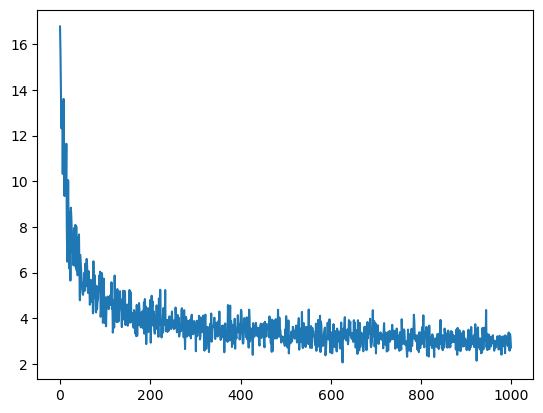

In [220]:
#training loss on a batch
steps = []
loss_p = []
for i in range(1000):
    #mini batching
    ix = torch.randint(0, xtr.shape[0], (32,)) # this takes (32,0) numbers from 0 to 228146 randomly

    #forward pass
    embed = c[xtr[ix]] #input layer
    m = embed.view(-1,6) @ W1 + b1 #hidden layer
    h = torch.tanh(m) #act function
    logit = h @ W2 + b2
    
    #calc loss
    loss = F.cross_entropy(logit, ytr[ix])
    #print(f'loss at iter {i} : {loss:.5f}')

    #calculating gradient
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data += -0.1 * p.grad
    steps.append(i)
    loss_p.append(loss.item())
print(f'loss : {loss.item()}')
plt.plot(steps, loss_p)
plt.show()

In [210]:
#validation loss
embed = c[xdev] #input layer
m = embed.view(-1,6) @ W1 + b1 #hidden layer
h = torch.tanh(m) #act function
logi = h @ W2 + b2
losse = F.cross_entropy(logi,ydev)
print(losse.item())

10.375611305236816
